In this code we will be using a dataset we found online, with BBC news titles and article contents. However, since the dataset only contains only around 2000 rows, we will enhance our dataset by web scraping additional articles from the BBC website. This will provide a more substantial dataset for achieving better results with our deep learning algorithm.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [ ]:
#dataset found on:
#https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive?select=bbc-news-data.csv

df = pd.read_csv('bbc-news-data.csv', sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df.shape

(2225, 4)

In [ ]:
df.isna().sum()

,0
category,0
filename,0
title,0
content,0


In [ ]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [ ]:
df = df[df.columns.drop(['category', 'filename'])]

df.head()

,title,content
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df.shape

(2225, 2)

Now we will scrape some more articles to add to the dataset

In [ ]:
# Function to scrape each article
def scrape_article(article_url):
    article_response = requests.get(article_url)
    article_soup = BeautifulSoup(article_response.content, 'html.parser')
    headline = article_soup.find('h1').text.strip() if article_soup.find('h1') else 'No headline found'
    paragraphs = article_soup.find_all('p')
    content = ' '.join([p.text for p in paragraphs])
    return {'url': article_url, 'title': headline, 'content': content}

In [ ]:
# Function to scrape links from a given page
def scrape_links(page_url):
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    article_links = []
    for a in soup.find_all('a', {'data-testid': 'internal-link'}, href=True):
        link = a['href']
        if link.startswith('/news/articles') or link.startswith('/sport/articles') or link.startswith('/business/articles') or link.startswith('/innovation/articles') or link.startswith('/culture/articles') or link.startswith('/travel/articles') or link.startswith('/future-planet/articles'):
            article_links.append('https://www.bbc.com' + link)
    return article_links

In [ ]:
# List of URLs to scrape
urls = [
    'https://www.bbc.com/sport/olympics',
    'https://www.bbc.com/sport/football',
    'https://www.bbc.com/sport/cricket',
    'https://www.bbc.com/sport/formula1',
    'https://www.bbc.com/sport/rugby-union',
    'https://www.bbc.com/sport/tennis',
    'https://www.bbc.com/sport/golf',
    'https://www.bbc.com/sport/athletics',
    'https://www.bbc.com/sport/cycling',
    'https://www.bbc.com/business',
    'https://www.bbc.com/business/technology-of-business',
    'https://www.bbc.com/business/women-at-the-helm',
    'https://www.bbc.com/business/future-of-business',
    'https://www.bbc.com/innovation',
    'https://www.bbc.com/innovation/technology',
    'https://www.bbc.com/innovation/science',
    'https://www.bbc.com/innovation/artificial-intelligence',
    'https://www.bbc.com/innovation/ai-v-the-mind',
    'https://www.bbc.com/culture',
    'https://www.bbc.com/culture/film-tv',
    'https://www.bbc.com/culture/music',
    'https://www.bbc.com/culture/art',
    'https://www.bbc.com/culture/style',
    'https://www.bbc.com/culture/books',
    'https://www.bbc.com/culture/entertainment-news',
    'https://www.bbc.com/travel',
    'https://www.bbc.com/travel/destinations/africa',
    'https://www.bbc.com/travel/destinations/antarctica',
    'https://www.bbc.com/travel/destinations/asia',
    'https://www.bbc.com/travel/destinations/australia-and-pacific',
    'https://www.bbc.com/travel/destinations/caribbean',
    'https://www.bbc.com/travel/destinations/central-america',
    'https://www.bbc.com/travel/destinations/europe',
    'https://www.bbc.com/travel/worlds-table',
    'https://www.bbc.com/travel/cultural-experiences',
    'https://www.bbc.com/travel/adventures',
    'https://www.bbc.com/travel/specialist',
    'https://www.bbc.com/future-planet',
    'https://www.bbc.com/future-planet/natural-wonders',
    'https://www.bbc.com/future-planet/weather-science',
    'https://www.bbc.com/future-planet/solutions',
    'https://www.bbc.com/future-planet/sustainable-business',
    'https://www.bbc.com/future-planet/green-living'
]

# Collect all article links from the provided URLs
all_article_links = []
for url in urls:
    all_article_links.extend(scrape_links(url))

# Scrape each article and store the content in a list
articles = []
for link in all_article_links:
    articles.append(scrape_article(link))

# Convert the list of articles to a pandas DataFrame
scraped_articles_df = pd.DataFrame(articles)

# Print the first 5 articles as examples
for article in articles[:5]:
    print(f"URL: {article['url']}")
    print(f"Title: {article['title']}")
    print(f"Content: {article['content'][:50]}...")  # Print first 50 characters of the content
    print("\n" + "="*80 + "\n")

URL: https://www.bbc.com/news/articles/cllyl14mr8lo
Title: TikTok sued for 'massive' invasion of child privacy
Content: The US government has filed a new lawsuit against ...


URL: https://www.bbc.com/news/articles/c7202xvpwn5o
Title: Stock markets plunge as weak US jobs fuel fears
Content: Stock markets were hit by a global sell-off on Fri...


URL: https://www.bbc.com/news/articles/cervr4km4jdo
Title: Fake caller app shut after thieves duped thousands
Content: The UK's National Crime Agency has shut down an on...


URL: https://www.bbc.com/news/articles/c51y1eqpqwxo
Title: Rolls-Royce to give each worker £700 in shares
Content: Rolls-Royce is to give every employee shares worth...


URL: https://www.bbc.com/news/articles/c16j3318n08o
Title: Intel axes 15,000 jobs after sales tumble
Content: US chip-maker Intel has said it plans to cut more ...




In [ ]:
scraped_articles_df.shape

(321, 3)

In [ ]:
scraped_articles_df = scraped_articles_df.drop_duplicates(subset=['url'])

scraped_articles_df.shape

(197, 3)

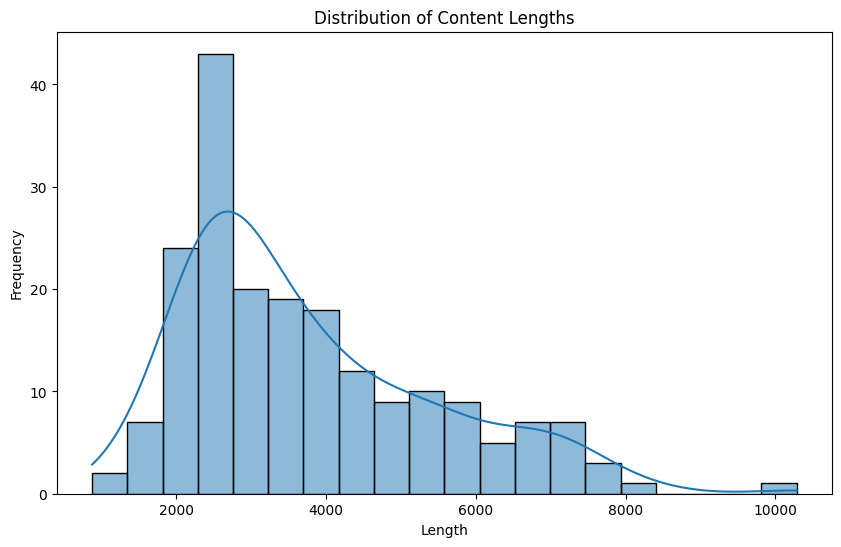

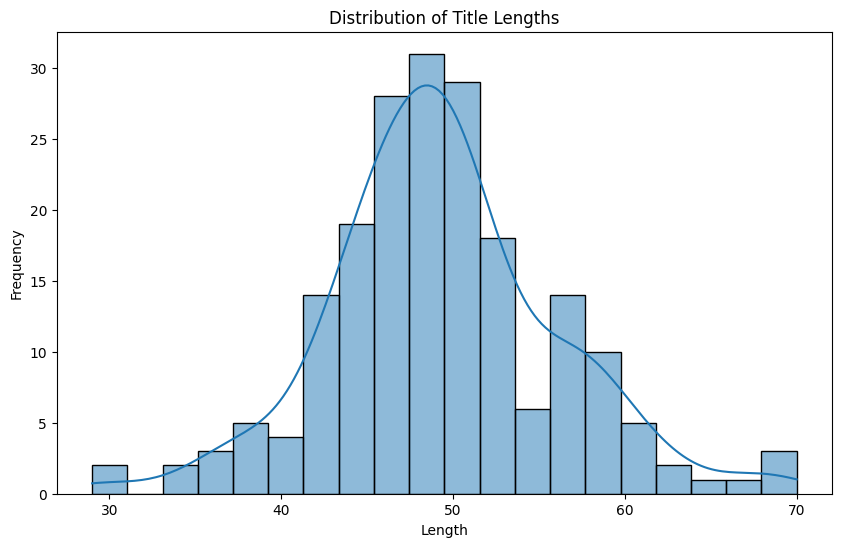

In [48]:
import matplotlib.pyplot as plt

# Extract the length of each article's content and title
scraped_articles_df['content_length'] = scraped_articles_df['content'].apply(len)
scraped_articles_df['title_length'] = scraped_articles_df['title'].apply(len)

# Create histograms of the content lengths and title lengths
plt.figure(figsize=(10, 6))

sns.histplot(scraped_articles_df['content_length'], bins=20, kde=True)
plt.title('Distribution of Content Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(scraped_articles_df['title_length'], bins=20, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
scraped_articles_df = scraped_articles_df[scraped_articles_df.columns.drop(['url', 'content_length', 'title_length'])]

scraped_articles_df.head()

,title,content
0,TikTok sued for 'massive' invasion of child pr...,The US government has filed a new lawsuit agai...
1,Stock markets plunge as weak US jobs fuel fears,Stock markets were hit by a global sell-off on...
2,Fake caller app shut after thieves duped thous...,The UK's National Crime Agency has shut down a...
3,Rolls-Royce to give each worker £700 in shares,Rolls-Royce is to give every employee shares w...
4,"Intel axes 15,000 jobs after sales tumble",US chip-maker Intel has said it plans to cut m...


In [ ]:
combined_articles_df = pd.concat([df, scraped_articles_df], ignore_index=True)

combined_articles_df

,title,content
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...
2417,Dolly Parton's Dollywood theme park hit by flood,A strong thunderstorm has caused a flash flood...
2418,UWE graduate wins BAFTA for flood documentary,A graduate from University of the West of Engl...
2419,"Huge California wildfire tears through 5,000 a...",An enormous wildfire has grown by 8 sq miles a...
2420,Pioneering surgeries leading a greener NHS,A group of medical practices has been describe...


In [ ]:
df.shape[0] + scraped_articles_df.shape[0], combined_articles_df.shape[0]

(2422, 2422)

While obviously 200 extra rows is not a life changer, it is pretty crucial to have a way of getting data on your own if its not already compiled in a dataset. For example, the initial dataset had 2225 rows, and when scraping BBC website for just one day we got around 200 rows. So, if we set this code to run periodically we would theoretically double the data we have in around 11 days, which is super useful when model accuracy is our main focus.

In [ ]:
#Finally we save the dataset:
combined_articles_df.to_csv('bbc-news-data-updated.csv', index=False)

Now we will move on to training our transformer model to generate titles.